In [2]:
# Import relevant modules
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from pybird_dev import pybird

In [10]:
zeff = 0.562
cosmo = {'omega_b': 0.02237, 'omega_cdm': 0.120, 'h': 0.6736, 'ln10^{10}A_s': 3.044, 'n_s': 0.9649}
kd = np.arange(0.005, 0.3, 0.005)
bdict = { "b1": 2., "b2": 0.7, "b3": 0.2, "b4": 0.7, "cct": -2., "cr1": 0. }
correlator = pybird.Correlator()
correlator.set({'output': 'bPk', 'multipole': 2, 'xdata': kd,'z': zeff, 'optiresum': False})
correlator.compute(cosmo, module='class')
fullpk = correlator.get(bdict)

In [22]:
# these are the corresponding EFT parameters of the following terms
# self.b11 = np.array([b1**2, 2. * b1 * f, f**2])
# self.bloop = np.array([1., b1, b2, b3, b4, b1 * b1, b1 * b2, b1 * b3, b1 * b4, b2 * b2, b2 * b4, b4 * b4])

In [24]:
# these are the linear terms
print ( correlator.bird.P11l.shape ) # shape is: (multipoles, loop/linear terms, ks)

(2, 3, 59)


In [25]:
# these are the loop terms
print ( correlator.bird.Ploopl.shape ) # shape is: (multipoles, loop/linear terms, ks)

(2, 12, 59)


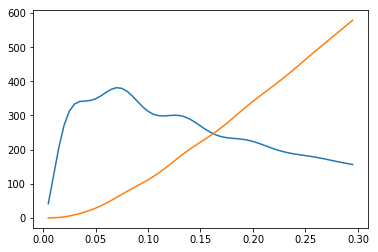

In [30]:
plt.plot(kd, kd * correlator.bird.P11l[0,0])
plt.plot(kd, - kd * correlator.bird.Ploopl[0,5])